# Final annotations dataframe creation

This notebook takes the csv annotations.csv file (from LUNA16 dataset) and add the malignancy level obtained with the '01_Malignancy_level_extraction' notebook, then saves the final annotations file

In [2]:
import os

import pandas as pd

In [3]:
annotations = pd.read_csv('annotations.csv')
candidates = pd.read_csv('candidates_V2.csv')
malignancy_df = pd.read_csv('malignancy_annotations.csv', sep=';')

# pre processing of malignancy_df 
malignancy_df = malignancy_df.drop(columns='Unnamed: 0').drop_duplicates()

In [4]:
print('Annotations shape:', annotations.shape, '-> columns: ', annotations.columns)
print('Candidates shape:', candidates.shape, '-> columns: ', candidates.columns)
print('Malignancy df shape:', malignancy_df.shape, '-> columns: ', malignancy_df.columns)

Annotations shape: (1186, 5) -> columns:  Index(['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm'], dtype='object')
Candidates shape: (754975, 5) -> columns:  Index(['seriesuid', 'coordX', 'coordY', 'coordZ', 'class'], dtype='object')
Malignancy df shape: (1294, 2) -> columns:  Index(['seriesuid', 'malignancy_Level'], dtype='object')


In [5]:
annotations.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [6]:
candidates.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,68.420000,-74.480000,-288.700000,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-95.209361,-91.809406,-377.426350,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-24.766755,-120.379294,-273.361539,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-63.080000,-65.740000,-344.240000,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,52.946688,-92.688873,-241.067872,0


In [7]:
malignancy_df.head()

,seriesuid,malignancy_Level
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102...,3
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.131939324905...,5
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.213233719488...,3
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.340202188094...,4
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.311102747717...,2


In [9]:
# Try to add malignancy to annoations.csv
df = annotations.join(malignancy_df.set_index('seriesuid'), on='seriesuid')
print(df.shape)
df.head()

(1186, 6)


,seriesuid,coordX,coordY,coordZ,diameter_mm,malignancy_Level
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,4
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708,4
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348,3
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262,5
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150,5


1    148
2    315
3    340
4    220
5    163
Name: malignancy_Level, dtype: int64


<AxesSubplot: >

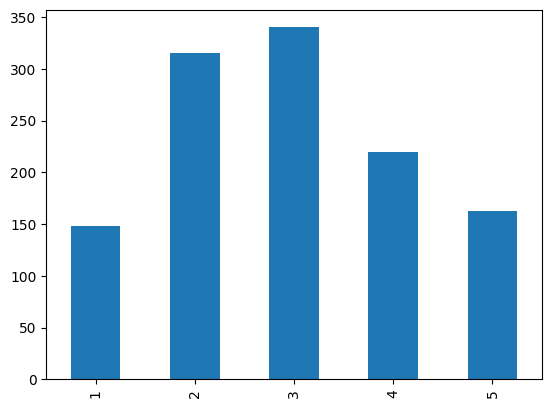

In [77]:
# check if there are row with malignancy_level = 0
values = df['malignancy_Level'].value_counts().sort_index()
print(values)
values.plot(kind='bar')

In [13]:
# add one column with the class: {malignant: 0, benign: 1}
class_list = []
for idx in range(len(df)):
    level = df['malignancy_Level'][idx]
    if level >= 4: # nodule is malignant
        class_list.append(0)
    else: 
        class_list.append(1)

In [16]:
df['class'] = class_list
df.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm,malignancy_Level,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471,4,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708,4,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348,3,1
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262,5,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150,5,0


In [18]:
df['class'].value_counts()

1    803
0    383
Name: class, dtype: int64

In [19]:
# save dataframe
df.to_csv('final_annotations.csv')
print('Done')

Done
